In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,AveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
'''
1. 读取数据
2. 将标签分为10类，对应0~9
3. reshape(-1,28,28,1)含义：
    (-1):这个位置表示数据量，-1就是将剩下的所有数据都放在这
         它也可以是其他数，如3000，就表示有3000个数据；
    (28,28):长28，宽28；
    (1): 颜色通道数，灰阶图是1，彩色图通常为3，表示rgb
'''


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, 10)
x_test = x_test.reshape((-1, 28, 28, 1))
y_test = to_categorical(y_test, 10)

In [3]:
'''
LeNet-5结构是：
1.卷积层：6种5*5卷积核，步长1
2.池化层：6种2*2采样核
3.卷积层：16种5*5卷积核，步长1
4.池化层：16种2*2采样核
5.卷积层：120种5*5卷积核，步长1
6.全连接层
7.输出层
'''


model = Sequential()
model.add(Conv2D(6, (5, 5), padding="valid",activation="tanh", input_shape=(28, 28, 1)))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(16,(5,5),padding="valid",activation="tanh"))
model.add(AveragePooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(10,activation="softmax"))

In [4]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [5]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=100,epochs=30,shuffle=True)

Epoch 1/30
600/600 [==============================] - 16s 27ms/step - loss: 1.1600 - accuracy: 0.6911 - val_loss: 0.3291 - val_accuracy: 0.9232
Epoch 2/30
600/600 [==============================] - 15s 25ms/step - loss: 0.3078 - accuracy: 0.9254 - val_loss: 0.2100 - val_accuracy: 0.9470
Epoch 3/30
600/600 [==============================] - 15s 24ms/step - loss: 0.2107 - accuracy: 0.9462 - val_loss: 0.1613 - val_accuracy: 0.9571
Epoch 4/30
600/600 [==============================] - 15s 24ms/step - loss: 0.1686 - accuracy: 0.9553 - val_loss: 0.1365 - val_accuracy: 0.9627
Epoch 5/30
600/600 [==============================] - 15s 24ms/step - loss: 0.1477 - accuracy: 0.9610 - val_loss: 0.1183 - val_accuracy: 0.9676
Epoch 6/30
600/600 [==============================] - 15s 24ms/step - loss: 0.1261 - accuracy: 0.9666 - val_loss: 0.1072 - val_accuracy: 0.9690
Epoch 7/30
600/600 [==============================] - 15s 25ms/step - loss: 0.1175 - accuracy: 0.9680 - val_loss: 0.0982 - val_accuracy:

In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

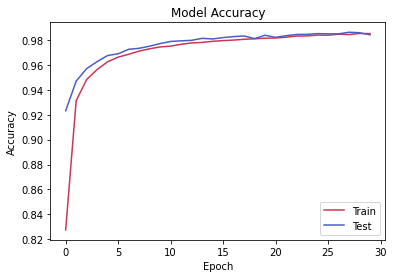

In [7]:
# 训练的准确率变化

plt.plot(history.history['accuracy'],color="#c93756")
plt.plot(history.history['val_accuracy'],color="#4b5cc4")

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"])
plt.show()

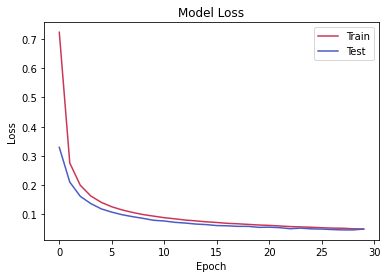

In [9]:
# 训练/验证的损失变化

plt.plot(history.history['loss'],color="#c93756")
plt.plot(history.history['val_loss'],color="#4b5cc4")

plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.show()

In [10]:
model.save("./LeNet5_model.h5")

In [14]:
from sklearn.metrics import classification_report

preds = model.predict(x_test, batch_size=100)
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
# 绘制模型结构
# plot_model(model, to_file='model.png', show_shapes=True)